In [37]:
%matplotlib inline

In [38]:
from __future__ import print_function

import datetime
import copy
import scipy.stats
import numpy as np
import cartopy
import cartopy.crs as ccrs
import matplotlib
import matplotlib.pyplot as plt
import toml

In [39]:
with open('data_sites.toml') as stat_file:
    sites = toml.load(stat_file)

manacapuru [-3.212972, -60.598056]
iquique [-20.54, -70.18]
finokalia [35.34, 25.67]
steamboat [40.455129, -106.788676]
ganges [29.3594, 79.458131]
NSA [71.323258, -156.61575]
maldives [-0.694149, 73.152771]
SGP [36.605, -97.485]
weybourne [52.95, 1.12]
macca [-54.64, 158.86]
cabauw [51.970383, 4.92625]
pointreyes [38.091, -122.957167]
chilbolton [51.144445, -1.438747]
munich [48.15, 10.98]
cacti [-32.12, -64.72]
capecod [41.664059, -70.24229]
svalbard [78.925259, 11.913133]
cruise2 [30.24608, -128.97008]
niamey [13.477542, 2.174339]
finland2 [62.733369, 27.555418]
hyytiaelae [61.843536, 24.287847]
graciosa [39.091094, -28.029167]
marcus [-56.75, 140.37]
TWP3 [-12.4246, 130.891597]
summit [72.58, -38.46]
juelich [50.9086, 6.4134]
palaiseau [48.71473, 2.21746]
cruise1 [25.04, -146.67]
granada [37.16, -3.61]
schneeferner [47.42, 10.98]
finland1 [67.971146, 24.178303]
leipzig [51.35341, 12.434639]
shouxian [32.558383, 116.78195]
mace [53.33, -9.90399]
barbados [13.162317, -59.428562]
ENA 

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


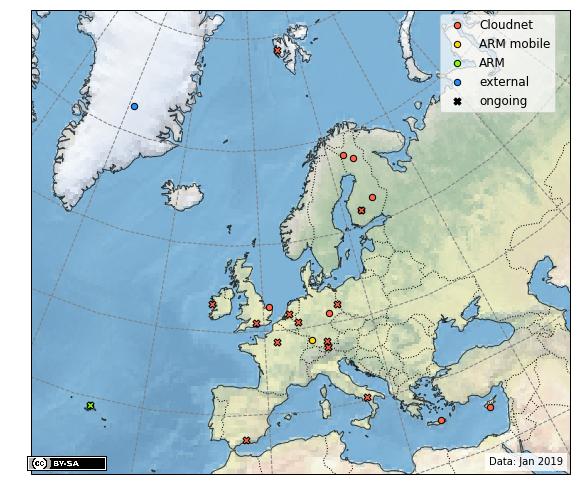

In [40]:
proj = ccrs.PlateCarree()
proj = ccrs.LambertConformal(central_longitude=-5.0, central_latitude=40.0)
#proj = ccrs.Miller()

fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection=proj)
ax.stock_img()
ax.coastlines('50m', alpha=0.7)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linestyle='--', color='gray', linewidth=1.)
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlocator = matplotlib.ticker.FixedLocator(range(-180, 181, 20))
gl.ylocator = matplotlib.ticker.FixedLocator(range(-90, 91, 10))
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER

for key, value in sites.items():
    print(key, value['coordinates'])
    if value['coordinates']:
        dt_end = True if value['duration'][1] == '0' else (
            datetime.datetime.strptime(value['duration'][1], '%Y-%m') > datetime.datetime(2019,1,1))
        if dt_end:
            m = 'X'
            s = 50
            l = ' ongoing'
            zo = 11
        else:
            m = 'o'
            s = 40
            l = ''
            zo = 10
        if value['network'] == 'cloudnet':
            ax.scatter(value['coordinates'][1], value['coordinates'][0], marker=m,
                       facecolor='tomato', edgecolor='black', s=s, zorder=zo,
                       transform=ccrs.PlateCarree(), label="Cloudnet" + l)
        if value['network'] == 'ARM_mobile':
            ax.scatter(value['coordinates'][1], value['coordinates'][0], marker=m,
                       facecolor='gold', edgecolor='black', s=s, zorder=zo,
                       transform=ccrs.PlateCarree(), label="ARM mobile"+l)
        if value['network'] == 'ARM':
            ax.scatter(value['coordinates'][1], value['coordinates'][0], marker=m,
                       facecolor='chartreuse', edgecolor='black', s=s, zorder=zo,
                       transform=ccrs.PlateCarree(), label="ARM"+l)
        if value['network'] == 'ARM_ext':
            ax.scatter(value['coordinates'][1], value['coordinates'][0], marker=m,
                       facecolor='dodgerblue', edgecolor='black', s=s, zorder=zo,
                       transform=ccrs.PlateCarree(), label="external"+l)
        
#ax.set_extent([-45, 55, 20, 85], ccrs.PlateCarree())
#ax.set_extent([0, 20, 46, 60], ccrs.PlateCarree())
#ax.set_extent([-15, 0, 46, 60], ccrs.PlateCarree())
ax.set_extent([-35, 45, 33, 80], ccrs.PlateCarree())

ax.text(0.85, 0.02, 'Data: Jan 2019', fontsize=10, 
        bbox=dict(facecolor='white', alpha=0.85, edgecolor='none'), 
        transform=ax.transAxes)
im = matplotlib.image.imread('cc-botton-by-sa.png')
newax = fig.add_axes([0.12, -0.05, 0.11, 0.2], zorder=3)
newax.imshow(im)
newax.axis('off')

handles, labels = ax.get_legend_handles_labels()
new_labels = [labels[labels.index('Cloudnet')], labels[labels.index('ARM mobile')], labels[labels.index('ARM')],
              labels[labels.index('external')], 'ongoing']
i = labels.index('Cloudnet ongoing')
handles[i] = copy.copy(handles[labels.index('Cloudnet ongoing')])
handles[i].set_color('black')
new_handles = [handles[labels.index('Cloudnet')], handles[labels.index('ARM mobile')], handles[labels.index('ARM')],
               handles[labels.index('external')], handles[labels.index('Cloudnet ongoing')]]
leg = ax.legend(new_handles, new_labels, loc=(0.76, 0.78), scatterpoints=1, fontsize=12)
leg.get_frame().set_alpha(0.7)

plt.tight_layout()
savepath = 'map_sites_europe.png'
plt.savefig(savepath, dpi=350)

manacapuru [-3.212972, -60.598056]
iquique [-20.54, -70.18]
finokalia [35.34, 25.67]
steamboat [40.455129, -106.788676]
ganges [29.3594, 79.458131]
NSA [71.323258, -156.61575]
maldives [-0.694149, 73.152771]
SGP [36.605, -97.485]
weybourne [52.95, 1.12]
macca [-54.64, 158.86]
cabauw [51.970383, 4.92625]
pointreyes [38.091, -122.957167]
chilbolton [51.144445, -1.438747]
munich [48.15, 10.98]
cacti [-32.12, -64.72]
capecod [41.664059, -70.24229]
svalbard [78.925259, 11.913133]
cruise2 [30.24608, -128.97008]
niamey [13.477542, 2.174339]
finland2 [62.733369, 27.555418]
hyytiaelae [61.843536, 24.287847]
graciosa [39.091094, -28.029167]
marcus [-56.75, 140.37]
TWP3 [-12.4246, 130.891597]
summit [72.58, -38.46]
juelich [50.9086, 6.4134]
palaiseau [48.71473, 2.21746]
cruise1 [25.04, -146.67]
granada [37.16, -3.61]
schneeferner [47.42, 10.98]
finland1 [67.971146, 24.178303]
leipzig [51.35341, 12.434639]
shouxian [32.558383, 116.78195]
mace [53.33, -9.90399]
barbados [13.162317, -59.428562]
ENA 

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


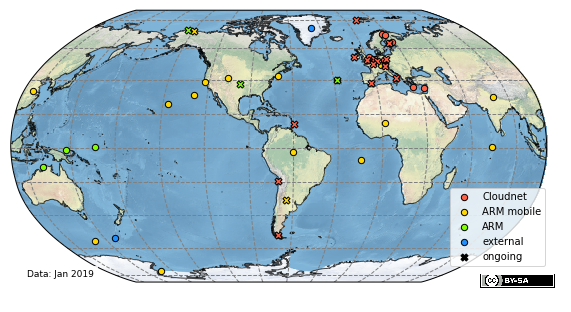

In [41]:
proj = ccrs.PlateCarree()
proj = ccrs.Miller(central_longitude=15.0)
proj = ccrs.Robinson(central_longitude=-70)

fig = plt.figure(figsize=(8,5.5))
ax = plt.axes(projection=proj)
ax.stock_img()
ax.coastlines('50m', alpha=0.7)
#ax.add_feature(cartopy.feature.BORDERS, linestyle=':')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linestyle='--', color='gray', linewidth=1.)
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlocator = matplotlib.ticker.FixedLocator(range(-180, 181, 30))
gl.ylocator = matplotlib.ticker.FixedLocator(range(-101, 101, 20))
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER

for key, value in sites.items():
    print(key, value['coordinates'])
    if value['coordinates']:
        dt_end = True if value['duration'][1] == '0' else (
            datetime.datetime.strptime(value['duration'][1], '%Y-%m') > datetime.datetime(2019,1,1))
        if dt_end:
            m = 'X'
            s = 50
            l = ' ongoing'
            zo = 11
        else:
            m = 'o'
            s = 40
            l = ''
            zo = 10
        if value['network'] == 'cloudnet':
            ax.scatter(value['coordinates'][1], value['coordinates'][0], marker=m,
                       facecolor='tomato', edgecolor='black', s=s, zorder=zo,
                       transform=ccrs.PlateCarree(), label="Cloudnet" + l)
        if value['network'] == 'ARM_mobile':
            ax.scatter(value['coordinates'][1], value['coordinates'][0], marker=m,
                       facecolor='gold', edgecolor='black', s=s, zorder=zo,
                       transform=ccrs.PlateCarree(), label="ARM mobile"+l)
        if value['network'] == 'ARM':
            ax.scatter(value['coordinates'][1], value['coordinates'][0], marker=m,
                       facecolor='chartreuse', edgecolor='black', s=s, zorder=zo,
                       transform=ccrs.PlateCarree(), label="ARM"+l)
        if value['network'] == 'ARM_ext':
            ax.scatter(value['coordinates'][1], value['coordinates'][0], marker=m,
                       facecolor='dodgerblue', edgecolor='black', s=s, zorder=zo,
                       transform=ccrs.PlateCarree(), label="external"+l)
        
ax.text(0.03, 0.02, 'Data: Jan 2019', fontsize=9, 
        bbox=dict(facecolor='white', alpha=0.85, edgecolor='none'), 
        transform=ax.transAxes)
im = matplotlib.image.imread('cc-botton-by-sa.png')
newax = fig.add_axes([0.84, 0.06, 0.13, 0.2], zorder=3)
newax.imshow(im)
newax.axis('off')

handles, labels = ax.get_legend_handles_labels()
new_labels = [labels[labels.index('Cloudnet')], labels[labels.index('ARM mobile')], labels[labels.index('ARM')],
              labels[labels.index('external')], 'ongoing']
i = labels.index('Cloudnet ongoing')
handles[i] = copy.copy(handles[labels.index('Cloudnet ongoing')])
handles[i].set_color('black')
new_handles = [handles[labels.index('Cloudnet')], handles[labels.index('ARM mobile')], handles[labels.index('ARM')],
               handles[labels.index('external')], handles[labels.index('Cloudnet ongoing')]]
#leg = ax.legend(new_handles, new_labels, loc=(0.74, 0.8), scatterpoints=1)
leg = ax.legend(new_handles, new_labels, scatterpoints=1, loc=(0.82, 0.06))
#leg.get_frame().set_alpha(0.7)

plt.tight_layout()
savepath = 'map_sites_world.png'
plt.savefig(savepath, dpi=350)

In [42]:
def calc_duration(site):
    begin = datetime.datetime.strptime(site['duration'][0],'%Y-%m')
    if site['duration'][1] == '0':
        end = datetime.datetime(2019,1,1)
    else:
        end = datetime.datetime.strptime(site['duration'][1]+'-15','%Y-%m-%d')
    print(site['duration'], begin, end)
    duration = end-begin
    return round(duration.days/30.)


mod_sites = []
for k,v in sites.items():
    duration = calc_duration(v)
    v.update({'shortname': k, 'dur_months': duration})
    print(k, duration)
    mod_sites.append(v)

lats = [value['coordinates'][0] for value in mod_sites]
lons = [value['coordinates'][1] for value in mod_sites]
dur_months = [value['dur_months'] for value in mod_sites]
#[print(s['coordinates'], lat, lon) for s, lat, lon in zip(mod_sites, lats, lons)]
#[print(s['dur_months'], m) for s, m in zip(mod_sites, dur_months)]
lon_edges=list(range(-180,186, 30))
lat_edges=list(range(-90,91, 30))
lat_edges=[-90,-65,-23,23,65,90]
lat_edges=[-90,-65,-35,0,35,65,90]
#lat_edges=[-90,-65,-37,-12,12,37,65,90]
print(lon_edges)
print(lat_edges)
ret = scipy.stats.binned_statistic_2d(np.array(lons)-5, lats, dur_months, statistic='sum', bins=[lon_edges, lat_edges])

print(ret)

['2014-01', '2015-11'] 2014-01-01 00:00:00 2015-11-15 00:00:00
manacapuru 23
['2018-03', '0'] 2018-03-01 00:00:00 2019-01-01 00:00:00
iquique 10
['2017-04', '2017-05'] 2017-04-01 00:00:00 2017-05-15 00:00:00
finokalia 1
['2010-09', '2011-04'] 2010-09-01 00:00:00 2011-04-15 00:00:00
steamboat 8
['2011-05', '2012-03'] 2011-05-01 00:00:00 2012-03-15 00:00:00
ganges 11
['1998-03', '0'] 1998-03-01 00:00:00 2019-01-01 00:00:00
NSA 254
['2011-09', '2012-03'] 2011-09-01 00:00:00 2012-03-15 00:00:00
maldives 7
['1998-10', '0'] 1998-10-01 00:00:00 2019-01-01 00:00:00
SGP 247
['2017-03', '2017-07'] 2017-03-01 00:00:00 2017-07-15 00:00:00
weybourne 5
['2016-01', '2016-10'] 2016-01-01 00:00:00 2016-10-15 00:00:00
macca 10
['2001-08', '0'] 2001-08-01 00:00:00 2019-01-01 00:00:00
cabauw 212
['2005-02', '2005-09'] 2005-02-01 00:00:00 2005-09-15 00:00:00
pointreyes 8
['1999-05', '0'] 1999-05-01 00:00:00 2019-01-01 00:00:00
chilbolton 240
['2017-06', '0'] 2017-06-01 00:00:00 2019-01-01 00:00:00
munich 1

[-165. -135. -105.  -75.  -45.  -15.   15.   45.   75.  105.  135.  165.]
[-77.5 -50.  -17.5  17.5  50.   77.5]
manacapuru [-3.212972, -60.598056]
iquique [-20.54, -70.18]
finokalia [35.34, 25.67]
steamboat [40.455129, -106.788676]
ganges [29.3594, 79.458131]
NSA [71.323258, -156.61575]
maldives [-0.694149, 73.152771]
SGP [36.605, -97.485]
weybourne [52.95, 1.12]
macca [-54.64, 158.86]
cabauw [51.970383, 4.92625]
pointreyes [38.091, -122.957167]
chilbolton [51.144445, -1.438747]
munich [48.15, 10.98]
cacti [-32.12, -64.72]
capecod [41.664059, -70.24229]
svalbard [78.925259, 11.913133]
cruise2 [30.24608, -128.97008]
niamey [13.477542, 2.174339]
finland2 [62.733369, 27.555418]
hyytiaelae [61.843536, 24.287847]
graciosa [39.091094, -28.029167]
marcus [-56.75, 140.37]
TWP3 [-12.4246, 130.891597]
summit [72.58, -38.46]
juelich [50.9086, 6.4134]
palaiseau [48.71473, 2.21746]
cruise1 [25.04, -146.67]
granada [37.16, -3.61]
schneeferner [47.42, 10.98]
finland1 [67.971146, 24.178303]
leipzig [5

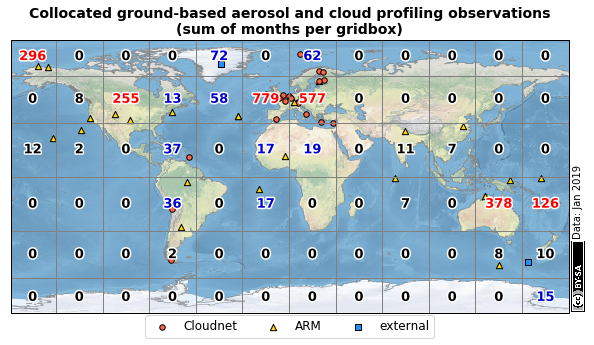

In [43]:
import matplotlib.patheffects as path_effects

x_mid = ret.x_edge[:-1] + np.diff(ret.x_edge)/2.
y_mid = ret.y_edge[:-1] + np.diff(ret.y_edge)/2.
print(x_mid)
print(y_mid)

proj = ccrs.PlateCarree(central_longitude=5)

fig = plt.figure(figsize=(10,5.5))
ax = plt.axes(projection=proj)
#ax.pcolormesh(ret.x_edge, ret.y_edge, np.transpose(ret.statistic), 
#              cmap='Wistia', transform=ccrs.PlateCarree())

#ax.stock_img()
ax.coastlines('50m', alpha=0.7, color='grey', linewidth=0.7)
#ax.scatter(lons, lats, marker='.', s=40, color='darkviolet', transform=ccrs.Geodetic(), label='station')
for key, value in sites.items():
    print(key, value['coordinates'])
    if value['coordinates']:
        dt_end = True if value['duration'][1] == '0' else (
            datetime.datetime.strptime(value['duration'][1], '%Y-%m') > datetime.datetime(2018,1,1))
        zo = 2
        color='darkviolet'
        if value['network'] == 'cloudnet':
            m = 'o'
            s = 30
            ax.scatter(value['coordinates'][1], value['coordinates'][0], marker=m,
                       facecolor='tomato', edgecolor='black', s=s, zorder=zo,
                       transform=ccrs.PlateCarree(), label="Cloudnet")
        if value['network'] == 'ARM_mobile':
            m = '^'
            s = 40
            ax.scatter(value['coordinates'][1], value['coordinates'][0], marker=m,
                       facecolor='gold', edgecolor='black', s=s, zorder=zo,
                       transform=ccrs.PlateCarree(), label="ARM mobile")
        if value['network'] == 'ARM':
            m = '^'
            s = 40
            ax.scatter(value['coordinates'][1], value['coordinates'][0], marker=m,
                       facecolor='gold', edgecolor='black', s=s, zorder=zo,
                       transform=ccrs.PlateCarree(), label="ARM")
            
        if value['network'] == 'ARM_ext':
            m = 's'
            s = 30
            ax.scatter(value['coordinates'][1], value['coordinates'][0], marker=m,
                       facecolor='dodgerblue', edgecolor='black', s=s, zorder=zo,
                       transform=ccrs.PlateCarree(), label="external")

ax.stock_img()

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linestyle='-', color='grey', linewidth=1.)
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlocator = matplotlib.ticker.FixedLocator(np.array(lon_edges)+5)
gl.ylocator = matplotlib.ticker.FixedLocator(lat_edges)

datapoints = []
for i in range(x_mid.shape[0]):
    for j in range(y_mid.shape[0]):
        #print(x_mid[i], y_mid[j], ret.statistic[i,j])
        dur_sum = ret.statistic[i,j]
        if dur_sum > 120:
            c = 'red'
        elif dur_sum > 12:
            c = 'mediumblue'
        else:
            c = 'black'
        
        t = ax.text(x_mid[i]+5, y_mid[j], int(ret.statistic[i,j]),
                    fontweight='bold', color=c, fontsize=13,
                    horizontalalignment='center', verticalalignment='center',
                    transform=ccrs.Geodetic())
        t.set_path_effects([path_effects.withStroke(linewidth=3, foreground='w')])
ax.set_title("Collocated ground-based aerosol and cloud profiling observations\n(sum of months per gridbox)", 
             fontweight='semibold', fontsize=14)

im = matplotlib.image.imread('cc-botton-by-sa.png')
newax = fig.add_axes([0.812, 0.16, 0.2, 0.18], zorder=3)
newax.imshow(np.rot90(im))
newax.axis('off')

ax.text(1.0175, 0.515, 'Data: Jan 2019', fontsize=10, 
        bbox=dict(facecolor='none', alpha=0.85, edgecolor='none'), transform=ax.transAxes, 
        rotation=90, verticalalignment='baseline', horizontalalignment='center')
# ax.text(0.6, 0.02, 'Data: Jan 2018; Visualisation: @martin_ra_', fontsize=10, 
#         bbox=dict(facecolor='white', alpha=0.7), transform=ax.transAxes)


handles, labels = ax.get_legend_handles_labels()
new_labels = [labels[labels.index('Cloudnet')], labels[labels.index('ARM')],
              labels[labels.index('external')]]
new_handles = [handles[labels.index('Cloudnet')], handles[labels.index('ARM')],
               handles[labels.index('external')]]
#leg = ax.legend(new_handles, new_labels, loc=(0.74, 0.8), scatterpoints=1)
leg = ax.legend(new_handles, new_labels, scatterpoints=1, 
                ncol=3, loc='center',
                bbox_to_anchor=(0.5, -0.05), framealpha=0.8, fontsize=12)

#plt.tight_layout()
savepath = 'map_profiling_observations_month_sum_network.png'
plt.savefig(savepath, dpi=350)

[-165. -135. -105.  -75.  -45.  -15.   15.   45.   75.  105.  135.  165.]
[-77.5 -50.  -17.5  17.5  50.   77.5]
manacapuru [-3.212972, -60.598056]
iquique [-20.54, -70.18]
finokalia [35.34, 25.67]
steamboat [40.455129, -106.788676]
ganges [29.3594, 79.458131]
NSA [71.323258, -156.61575]
maldives [-0.694149, 73.152771]
SGP [36.605, -97.485]
weybourne [52.95, 1.12]
macca [-54.64, 158.86]
cabauw [51.970383, 4.92625]
pointreyes [38.091, -122.957167]
chilbolton [51.144445, -1.438747]
munich [48.15, 10.98]
cacti [-32.12, -64.72]
capecod [41.664059, -70.24229]
svalbard [78.925259, 11.913133]
cruise2 [30.24608, -128.97008]
niamey [13.477542, 2.174339]
finland2 [62.733369, 27.555418]
hyytiaelae [61.843536, 24.287847]
graciosa [39.091094, -28.029167]
marcus [-56.75, 140.37]
TWP3 [-12.4246, 130.891597]
summit [72.58, -38.46]
juelich [50.9086, 6.4134]
palaiseau [48.71473, 2.21746]
cruise1 [25.04, -146.67]
granada [37.16, -3.61]
schneeferner [47.42, 10.98]
finland1 [67.971146, 24.178303]
leipzig [5

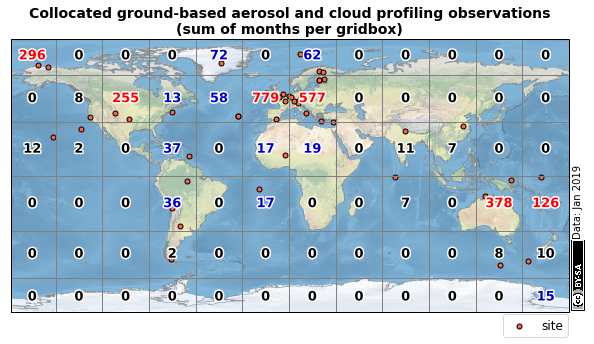

In [44]:
import matplotlib.patheffects as path_effects

x_mid = ret.x_edge[:-1] + np.diff(ret.x_edge)/2.
y_mid = ret.y_edge[:-1] + np.diff(ret.y_edge)/2.
print(x_mid)
print(y_mid)

proj = ccrs.PlateCarree(central_longitude=5)

fig = plt.figure(figsize=(10,5.5))
ax = plt.axes(projection=proj)
#ax.pcolormesh(ret.x_edge, ret.y_edge, np.transpose(ret.statistic), 
#              cmap='Wistia', transform=ccrs.PlateCarree())

#ax.stock_img()
ax.coastlines('50m', alpha=0.7, color='grey', linewidth=0.7)
#ax.scatter(lons, lats, marker='.', s=40, color='darkviolet', transform=ccrs.Geodetic(), label='station')
for key, value in sites.items():
    print(key, value['coordinates'])
    if value['coordinates']:
        dt_end = True if value['duration'][1] == '0' else (
            datetime.datetime.strptime(value['duration'][1], '%Y-%m') > datetime.datetime(2018,1,1))
        zo = 2
        color='darkviolet'
        m = 'o'
        s = 25
        ax.scatter(value['coordinates'][1], value['coordinates'][0], marker=m,
                   facecolor='tomato', edgecolor='black', s=s, zorder=zo,
                   transform=ccrs.PlateCarree(), label="site")


ax.stock_img()

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linestyle='-', color='grey', linewidth=1.)
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlocator = matplotlib.ticker.FixedLocator(np.array(lon_edges)+5)
gl.ylocator = matplotlib.ticker.FixedLocator(lat_edges)

datapoints = []
for i in range(x_mid.shape[0]):
    for j in range(y_mid.shape[0]):
        #print(x_mid[i], y_mid[j], ret.statistic[i,j])
        dur_sum = ret.statistic[i,j]
        if dur_sum > 120:
            c = 'red'
        elif dur_sum > 12:
            c = 'mediumblue'
        else:
            c = 'black'
        
        t = ax.text(x_mid[i]+5, y_mid[j], int(ret.statistic[i,j]),
                    fontweight='bold', color=c, fontsize=13,
                    horizontalalignment='center', verticalalignment='center',
                    transform=ccrs.Geodetic())
        t.set_path_effects([path_effects.withStroke(linewidth=3, foreground='w')])
ax.set_title("Collocated ground-based aerosol and cloud profiling observations\n(sum of months per gridbox)", 
             fontweight='semibold', fontsize=14)

im = matplotlib.image.imread('cc-botton-by-sa.png')
newax = fig.add_axes([0.812, 0.16, 0.2, 0.18], zorder=3)
newax.imshow(np.rot90(im))
newax.axis('off')

ax.text(1.0175, 0.515, 'Data: Jan 2019', fontsize=10, 
        bbox=dict(facecolor='none', alpha=0.85, edgecolor='none'), transform=ax.transAxes, 
        rotation=90, verticalalignment='baseline', horizontalalignment='center')
# ax.text(0.6, 0.02, 'Data: Jan 2018; Visualisation: @martin_ra_', fontsize=10, 
#         bbox=dict(facecolor='white', alpha=0.7), transform=ax.transAxes)


handles, labels = ax.get_legend_handles_labels()
new_labels = [labels[labels.index('site')]]
new_handles = [handles[labels.index('site')]]
#leg = ax.legend(new_handles, new_labels, loc=(0.74, 0.8), scatterpoints=1)
leg = ax.legend(new_handles, new_labels, scatterpoints=1, 
                ncol=3, loc='center',
                bbox_to_anchor=(0.94, -0.05), framealpha=0.8, fontsize=12)

#plt.tight_layout()
savepath = 'map_profiling_observations_month_sum.png'
plt.savefig(savepath, dpi=350)

In [45]:
print(mod_sites[1].keys())

coord_array = np.array([value['coordinates'] for value in mod_sites])
# lats = [value['coordinates'][0] for value in mod_sites]
# lons = [value['coordinates'][1] for value in mod_sites]
# dur_months = [value['dur_months'] for value in mod_sites]
#print(coord_array)

dict_keys(['institution', 'location', 'duration', 'shortname', 'network', 'coordinates', 'dur_months'])


In [52]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=12, min_samples=1).fit(coord_array)
print('clusters ', clustering.labels_)

colorcycle = ["lawngreen", "dodgerblue", "mediumvioletred", "orangered", "blue", "orange"]

cluster_props = []
for i in np.unique(clustering.labels_):
    
    station_ids = np.where(clustering.labels_ == i)[0].tolist()
    sites_in_cluster = [mod_sites[i] for i in station_ids]
    station_names = [v['location'] for v in sites_in_cluster]
    center_lat = np.mean([value['coordinates'][0] for value in sites_in_cluster])
    center_lon = np.mean([value['coordinates'][1] for value in sites_in_cluster])
    duration = np.sum(np.array([value['dur_months'] for value in sites_in_cluster]))
    plot_coords = (center_lat+5, center_lon+5)
    if center_lat > 75:
        plot_coords = (center_lat-5, center_lon-6)
    if 'Point Reyes' in station_names:
        plot_coords = (center_lat-4, center_lon+5)
    if set(['Cabauw', 'Leipzig', 'Lindenberg', 'Chilbolton', 'Jülich', 'Palaiseau']) < set(station_names):
        plot_coords = (center_lat-5, center_lon+5)
    if ['Granada'] == station_names:
        plot_coords = (center_lat-5, center_lon+5)
    
    print('cluster ', i, center_lat, center_lon, duration)
    if len(station_names) > 1:
        color = colorcycle.pop()
        marker = 's'
        label = None
    else:
        color = 'dimgrey'
        marker = 'o'
        label = 'site'
    print('members ', station_names, color)
    cluster_props.append({'dur_months': duration, 'center_coords': (center_lat, center_lon),
                          'plot_coords': plot_coords, "color":color, "marker": marker, 'label': label,
                          'sites': sites_in_cluster})
    

clusters  [ 0  1  2  3  4  5  6  3  2  7  2  8  2  2  9 10 11  8 12 13 13 14 15 16
 17  2  2 18 19  2 13  2 20  2 21 14  2  2 13 22 23  2  5 24  2 13 25 26]
cluster  0 -3.212972 -60.598056 23
members  ['Manacapuru'] dimgrey
cluster  1 -20.54 -70.18 10
members  ['Iquique'] dimgrey
cluster  2 47.66526364285714 9.6198545 1312
members  ['Finokalia', 'Weybourne', 'Cabauw', 'Chilbolton', 'Munich', 'Jülich', 'Palaiseau', 'Schneefernerhaus', 'Leipzig', 'Mace-Head', 'Limassol', 'Potenza', 'Black Forest', 'Lindenberg'] orange
cluster  3 38.530064499999995 -102.136838 255
members  ['Steamboat Springs', 'Southern Great Plains'] blue
cluster  4 29.3594 79.458131 11
members  ['Ganges Valley'] dimgrey
cluster  5 70.90925250000001 -153.2513165 296
members  ['North Slope of Alaska', 'Oliktok Point'] orangered
cluster  6 -0.694149 73.152771 7
members  ['Gan Island, Maldives'] dimgrey
cluster  7 -54.64 158.86 10
members  ['Macquarie Island'] dimgrey
cluster  8 34.16854 -125.9636235 10
members  ['Point Re

manacapuru 0 dimgrey
manacapuru 0 dimgrey
selected site manacapuru ('dimgrey', 'o', 'site')
iquique 1 dimgrey
iquique 1 dimgrey
selected site iquique ('dimgrey', 'o', 'site')
finokalia 2 orange
finokalia 2 orange
selected site finokalia ('orange', 's', None)
steamboat 3 blue
steamboat 3 blue
selected site steamboat ('blue', 's', None)
ganges 4 dimgrey
ganges 4 dimgrey
selected site ganges ('dimgrey', 'o', 'site')
NSA 5 orangered
NSA 5 orangered
selected site NSA ('orangered', 's', None)
maldives 6 dimgrey
maldives 6 dimgrey
selected site maldives ('dimgrey', 'o', 'site')
SGP 3 blue
SGP 3 blue
selected site SGP ('blue', 's', None)
weybourne 2 orange
weybourne 2 orange
selected site weybourne ('orange', 's', None)
macca 7 dimgrey
macca 7 dimgrey
selected site macca ('dimgrey', 'o', 'site')
cabauw 2 orange
cabauw 2 orange
selected site cabauw ('orange', 's', None)
pointreyes 8 mediumvioletred
pointreyes 8 mediumvioletred
selected site pointreyes ('mediumvioletred', 's', None)
chilbolton 2

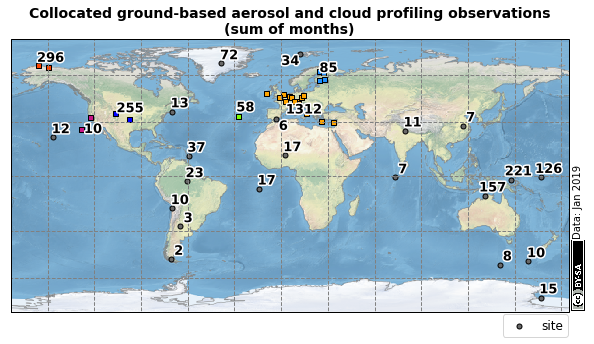

In [54]:
proj = ccrs.PlateCarree(central_longitude=5)

fig = plt.figure(figsize=(10,5.5))
ax = plt.axes(projection=proj)

def get_cluster(cluster_props, site):
    for i, v in enumerate(cluster_props):
        if site in [s['shortname'] for s in v['sites']]:
            print(site, i, v['color'])
            return v['color'], v['marker'], v["label"]


ax.coastlines('50m', alpha=0.7, color='grey', linewidth=0.7)
#ax.scatter(lons, lats, marker='.', s=40, color='darkviolet', transform=ccrs.Geodetic(), label='station')
for key, value in sites.items():
    #print(key, value['coordinates'])
    if value['coordinates']:
        dt_end = True if value['duration'][1] == '0' else (
            datetime.datetime.strptime(value['duration'][1], '%Y-%m') > datetime.datetime(2018,1,1))
        zo = 2
        c, m, label = get_cluster(cluster_props, key)
        s = 25
        print("selected site", key, get_cluster(cluster_props, key))
        ax.scatter(value['coordinates'][1], value['coordinates'][0], marker=m,
                   facecolor=c, edgecolor='black', s=s, zorder=zo,
                   transform=ccrs.PlateCarree(), label=label)

ax.stock_img()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linestyle='--', color='gray', linewidth=1.)
gl.xlabels_top = False
gl.ylabels_left = False
lat_edges=[-90,-65,-35,0,35,65,90]
gl.xlocator = matplotlib.ticker.FixedLocator(range(-180, 181, 30))
#gl.ylocator = matplotlib.ticker.FixedLocator(range(-90, 91, 30))
gl.ylocator = matplotlib.ticker.FixedLocator(lat_edges)
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER

for e in cluster_props:
#     if e['dur_months'] > 120:
#         c = 'red'
#     elif e['dur_months'] > 12:
#         c = 'mediumblue'
#     else:
#        c = 'black'
    c = 'black'
    t = ax.text(e['plot_coords'][1], e['plot_coords'][0], int(e['dur_months']),
            fontweight='bold', color=c, fontsize=13,
            horizontalalignment='center', verticalalignment='center',
            transform=ccrs.Geodetic())  
    t.set_path_effects([path_effects.withStroke(linewidth=3, foreground='w')])     

ax.set_title("Collocated ground-based aerosol and cloud profiling observations\n(sum of months)", 
             fontweight='semibold', fontsize=14)

im = matplotlib.image.imread('cc-botton-by-sa.png')
newax = fig.add_axes([0.812, 0.16, 0.2, 0.18], zorder=3)
newax.imshow(np.rot90(im))
newax.axis('off')

ax.text(1.0175, 0.515, 'Data: Jan 2019', fontsize=10, 
        bbox=dict(facecolor='none', alpha=0.85, edgecolor='none'), transform=ax.transAxes, 
        rotation=90, verticalalignment='baseline', horizontalalignment='center')
# ax.text(0.6, 0.02, 'Data: Jan 2018; Visualisation: @_martin_rdz_', fontsize=10, 
#         bbox=dict(facecolor='white', alpha=0.7), transform=ax.transAxes)


handles, labels = ax.get_legend_handles_labels()
new_labels = [labels[labels.index('site')]]
new_handles = [handles[labels.index('site')]]
#leg = ax.legend(new_handles, new_labels, loc=(0.74, 0.8), scatterpoints=1)
leg = ax.legend(new_handles, new_labels, scatterpoints=1, 
                ncol=3, loc='center',
                bbox_to_anchor=(0.94, -0.05), framealpha=0.8, fontsize=12)

#plt.tight_layout()
savepath = 'map_profiling_observations_month_sum_cluster.png'
plt.savefig(savepath, dpi=350)